In [1]:
import os
import re
import numpy as np
from scipy import ndimage

import sys
import pickle
from scipy import stats
import json
import tables

import matplotlib.pyplot as plt

import importlib.util #import from superordinate folder
spec = importlib.util.spec_from_file_location("helper", 
                                              str(re.search("(.*/)",os.getcwd()).groups(0)[0])+"helper.py")
helper = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helper)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Now you can zoom
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import sys
from scipy.optimize import curve_fit
import seaborn as sns


# Compute bandpower and 2d/1d motion data in the required format (non-nested dictionary to np.array of values)

In [4]:
power = {}

In [5]:
folder = "/mnt/c/Users/eler/Documents/Cognitive_Science/Bachelorarbeit/Scripts/processing_pipeline/dyad_13/"
vmrk_c = folder+"DualEEG_RPS_C_13.vmrk"
vmrk_ps = folder+"DualEEG_RPS_PS_13.vmrk"
vmrk_fp = folder+"DualEEG_RPS_FP_13.vmrk"

vmrks = [helper.parse_vmrk(vmrk_c),helper.parse_vmrk(vmrk_ps),helper.parse_vmrk(vmrk_fp)]

In [6]:
electrodes_p1 = ['FZ_1', 'F3_1', 'F7_1', 'F9_1', 'FT7_1', 'FC3_1', 'FC1_1', 'Cz_1',
       'C3_1', 'T7_1', 'CP3_1', 'Pz_1', 'P3_1', 'P7_1', 'PO9_1', 'O1_1',
       'O2_1', 'PO10_1', 'P8_1', 'P4_1', 'CP4_1', 'TP10_1', 'T8_1',
       'C4_1', 'FT8_1', 'FC4_1', 'FC2_1', 'F4_1', 'F8_1', 'F10_1', 'V1_1', 'V2_1']
raw_eegs = ["DualEEG_RPS_C_13.eeg","DualEEG_RPS_FP_13.eeg","DualEEG_RPS_PS_13.eeg"]

exclude = [0,1,3,5,17,20,31,37]

In [7]:
power = helper.combined_trials_for_dyad(folder, raw_eegs, vmrks, 0,exclude,electrodes_p1)

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

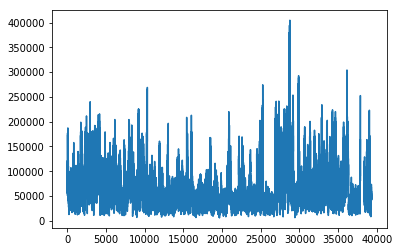

In [26]:
plt.plot(power['alpha_F7_1'])

In [8]:
directory = os.getcwd() + "/"
file = "RPS_C_13_C3.hdf5"
root = re.search("(.*)\.",file).groups()[0]

identifier = ["left_head","left_hands","left_body"]
jsons = [root+"_left_head.json",root+"_left_hands.json",root+"_left_body.json"]

In [9]:
motion = {}
for i,j in zip(identifier,jsons):
    try:
        with open(directory+j, encoding='utf-8') as fh:
            roi = json.load(fh)
            h264 = tables.open_file(directory+file, mode='r')
            h264 = h264.root.motion_tensor
            mothistmap = helper.weighted_histograms(h264,roi=roi)
            #dictionary[i] = mothistmap#append mothistmap

            hist = ndimage.gaussian_filter(mothistmap,10)
            amount = np.sum(hist,axis=0)#1d signal
            motion[i] = amount

            #Avoid multikollinearity that arises from smoothing
            left = np.sum(mothistmap[0:5,:],axis=0)+np.sum(mothistmap[31:,:],axis=0)
            down = np.sum(mothistmap[5:14,:],axis=0)
            right = np.sum(mothistmap[14:23,:],axis=0)
            up = np.sum(mothistmap[23:31,:],axis=0)
            motion[i+"_up"] = up
            motion[i+"_down"] = down
            motion[i+"_left"] = left
            motion[i+"_right"] = right
            
    except Exception as e:
        print(e)

0.0
0.0055617352614015575
0.011123470522803115
0.01668520578420467
0.02224694104560623
0.027808676307007785
0.03337041156840934
0.0389321468298109
0.04449388209121246
0.05005561735261402
0.05561735261401557
0.06117908787541713
0.06674082313681869
0.07230255839822025
0.0778642936596218
0.08342602892102335
0.08898776418242492
0.09454949944382647
0.10011123470522804
0.10567296996662959
0.11123470522803114
0.1167964404894327
0.12235817575083426
0.12791991101223582
0.13348164627363737
0.13904338153503892
0.1446051167964405
0.15016685205784205
0.1557285873192436
0.16129032258064516
0.1668520578420467
0.1724137931034483
0.17797552836484984
0.1835372636262514
0.18909899888765294
0.1946607341490545
0.20022246941045607
0.20578420467185762
0.21134593993325917
0.21690767519466073
0.22246941045606228
0.22803114571746386
0.2335928809788654
0.23915461624026696
0.2447163515016685
0.25027808676307006
0.25583982202447164
0.26140155728587317
0.26696329254727474
0.2725250278086763
0.27808676307007785
0.28

0.40044493882091214
0.40600667408231367
0.41156840934371525
0.41713014460511677
0.42269187986651835
0.42825361512791993
0.43381535038932145
0.43937708565072303
0.44493882091212456
0.45050055617352613
0.4560622914349277
0.46162402669632924
0.4671857619577308
0.4727474972191324
0.4783092324805339
0.4838709677419355
0.489432703003337
0.4949944382647386
0.5005561735261401
0.5061179087875417
0.5116796440489433
0.5172413793103449
0.5228031145717463
0.5283648498331479
0.5339265850945495
0.5394883203559511
0.5450500556173526
0.5506117908787542
0.5561735261401557
0.5617352614015573
0.5672969966629589
0.5728587319243604
0.578420467185762
0.5839822024471635
0.5895439377085651
0.5951056729699666
0.6006674082313682
0.6062291434927698
0.6117908787541713
0.6173526140155728
0.6229143492769744
0.628476084538376
0.6340378197997776
0.639599555061179
0.6451612903225806
0.6507230255839822
0.6562847608453838
0.6618464961067854
0.6674082313681868
0.6729699666295884
0.67853170189099
0.6840934371523916
0.68965

In [42]:
for k, v in power.items():
    power[k] = ndimage.filters.gaussian_filter1d(v,2)
    
for k, v in power.items():
    power[k] = ndimage.filters.gaussian_filter1d(v,50)


In [45]:
#print(len(dictionary["alpha_F7_1"]))
print(len(power["alpha_F7_1"]))

12319


# Strap down data to same length, dicard beginning

In [44]:
idx = [x == "S128" for x in helper.parse_vmrk(vmrk_c)['description']].index(True)
time = int(helper.parse_vmrk(vmrk_c)['time'][idx])//20

In [13]:
for k, v in power.items():
    power[k] = v[time:]
    

In [14]:
dictionary = {**power,**motion}

In [15]:
minsize = 9999999999999999999999
for val in dictionary.values():
    if len(val)<minsize:
        minsize = len(val)

In [16]:
minsize

17419

In [17]:
for key, value in dictionary.items():
    dictionary[key] = value[:minsize]

In [18]:
df = pd.DataFrame(dictionary)

In [20]:
correlation_matrix = df.corr().round(2)

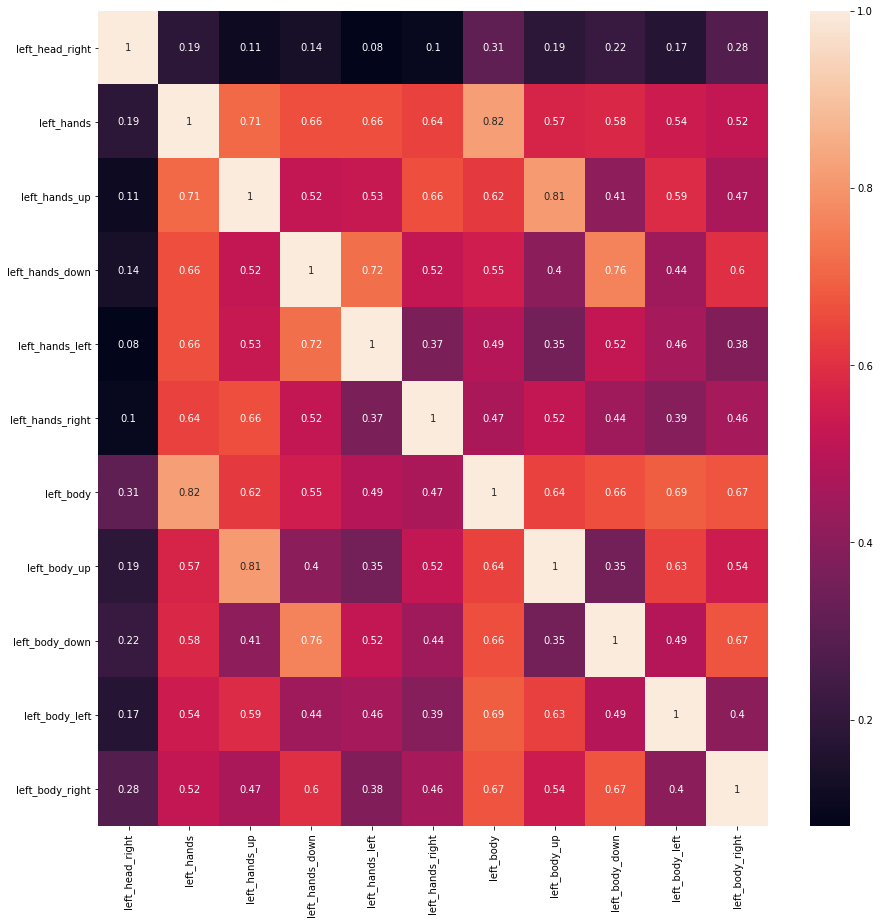

In [30]:
plt.figure(figsize = (15,15))
sns.heatmap(data=correlation_matrix.iloc[26*4:,26*4:], annot=True)

In [ ]:
def generate_training_and_test_data():
    pass

# Learning how to do it

In [28]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [29]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [40]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [41]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
boston['MEDV'] = boston_dataset.target

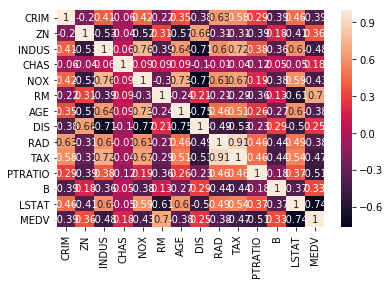

In [43]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'MEDV')

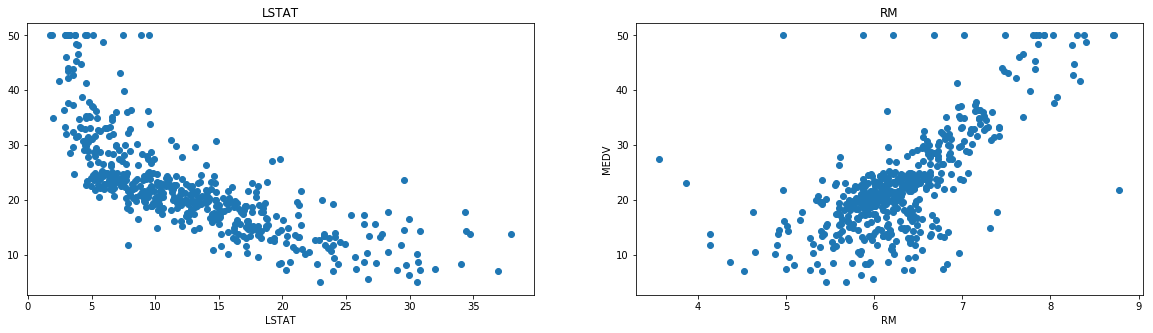

In [49]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
plt.ylabel('MEDV')

In [50]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

NameError: name 'r2_score' is not defined

In [20]:
electrodes_p1 = ['FZ_1', 'F3_1', 'F7_1', 'F9_1', 'FT7_1', 'FC3_1', 'FC1_1', 'Cz_1',
       'C3_1', 'T7_1', 'CP3_1', 'Pz_1', 'P3_1', 'P7_1', 'PO9_1', 'O1_1',
       'O2_1', 'PO10_1', 'P8_1', 'P4_1', 'CP4_1', 'TP10_1', 'T8_1',
       'C4_1', 'FT8_1', 'FC4_1', 'FC2_1', 'F4_1', 'F8_1', 'F10_1', 'V1_1',
       'V2_1']
electrodes_p2 = ['Fz_2', 'F3_2', 'F7_2', 'F9_2', 'FT7_2', 'FC3_2', 'FC1_2',
       'Cz_2', 'C3_2', 'T7_2', 'CP3_2', 'Pz_2', 'P3_2', 'P7_2', 'PO9_2',
       'O1_2', 'O2_2', 'PO10_2', 'P8_2', 'P4_2', 'CP4_2', 'TP10_2',
       'T8_2', 'C4_2', 'FT8_2', 'FC4_2', 'FC2_2', 'F4_2', 'F8_2', 'F10_2',
       'V1_2', 'V2_2']

In [20]:
electrodes = ['FZ_1', 'F3_1', 'F7_1', 'F9_1', 'FT7_1', 'FC3_1', 'FC1_1', 'Cz_1',
       'C3_1', 'T7_1', 'CP3_1', 'Pz_1', 'P3_1', 'P7_1', 'PO9_1', 'O1_1',
       'O2_1', 'PO10_1', 'P8_1', 'P4_1', 'CP4_1', 'TP10_1', 'T8_1',
       'C4_1', 'FT8_1', 'FC4_1', 'FC2_1', 'F4_1', 'F8_1', 'F10_1', 'V1_1',
       'V2_1', 'Fz_2', 'F3_2', 'F7_2', 'F9_2', 'FT7_2', 'FC3_2', 'FC1_2',
       'Cz_2', 'C3_2', 'T7_2', 'CP3_2', 'Pz_2', 'P3_2', 'P7_2', 'PO9_2',
       'O1_2', 'O2_2', 'PO10_2', 'P8_2', 'P4_2', 'CP4_2', 'TP10_2',
       'T8_2', 'C4_2', 'FT8_2', 'FC4_2', 'FC2_2', 'F4_2', 'F8_2', 'F10_2',
       'V1_2', 'V2_2']